# Исследование компьютерных игр

Цель исследования - выявить факторы определяющие успешность игры. Для этого у нас собраны данные из открытых источников, о продажах игр, оценки пользователей и экспертов, жанры и платформы. Выявленные факторы позволят определить потенциально успещные игры и спланировать рекламные компании.

### Изучение данных из файла

Загрузим библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from scipy import stats as st

Обновим seaborn

In [2]:
pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


Создадим переменную df и загрузим туда датафрейм, посмотрим общую информацию о нем

In [3]:
df_games = pd.read_csv('/datasets/games.csv')

In [4]:
df_games.info()
df_games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### Вывод

Мы видим что данные имеют ряд проблем:
* Названия столбцов в разных регистрах, что может создать проблемы в будующем
* в данных есть большое кол-во пропусков в столбцах с оценками и рейтингом
* неправитльные типы данных(float в столбцах с годом выпуска и оценками критиков, а так же object в колонке с оценками пользователей)

Далее нам предстоит обработать данные и подготовить их к дальнейшему анализу.

### Подготовка данных

#### Предобработка данных

**Приведем названия столбцов к нижнему регистру**

In [6]:
# применим функцию lower
df_games.columns = df_games.columns.str.lower()

Проверим на наличие грубых дубликатов

In [7]:
df_games.duplicated().sum()

0

**Преобразуем данные к нужному типу**

In [8]:
# заменим object методом to_numeric
# df_games['user_score'] = pd.to_numeric(df_games['user_score'])

Мы получили ошибку которая указывает на то что в данных есть не числовое значение tbd. tbd - это аббревиатура от английского To Be Determined (будет определено), заменим эти значения на NaN, укажем в параметре errors значение coerce.
Для удобства закоментируем код выше.

In [9]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

In [10]:
# float заменим методом astype
df_games[['year_of_release', 'critic_score']] = df_games[['year_of_release', 'critic_score']].astype('Int64')
# проверим результат
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


**Обработаем пропуски в колонках**

Пропуски в колонках с рейтингом и оценками могут быть вызваны тем, что данные взяты начиная с 1980 года. Возможно в то время не было учета рейтинга игр или не было четких критериев оценки игр. Проверим предположение

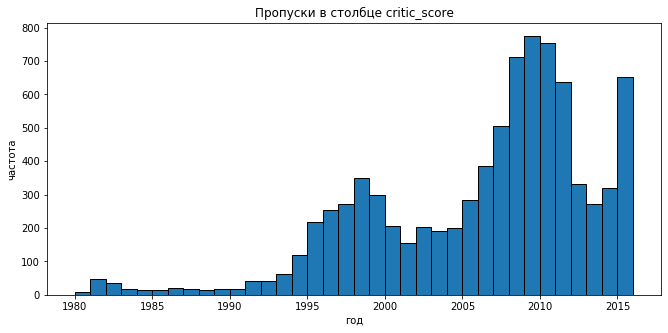

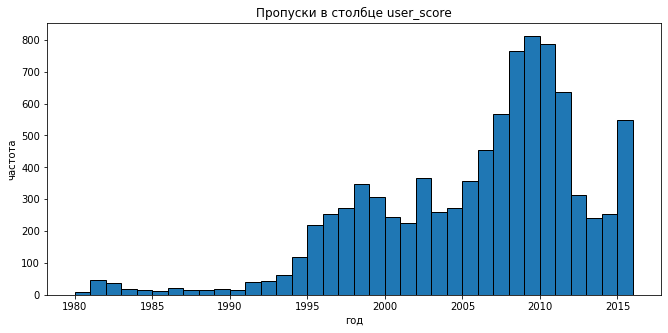

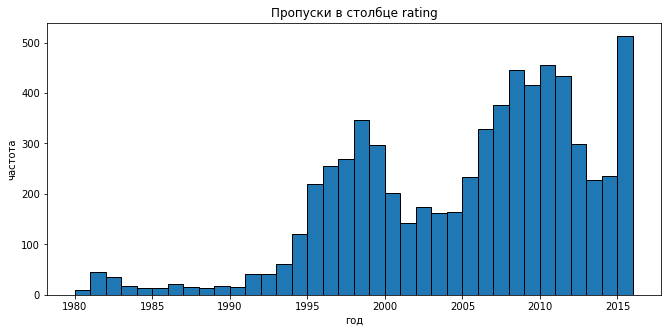

In [11]:
columns_list = ['critic_score', 'user_score', 'rating']
title_list = ['Пропуски в столбце critic_score',
              'Пропуски в столбце user_score',
              'Пропуски в столбце rating']

for i in range(len(columns_list)):
    plt.figure(figsize=(11, 5))
    plt.hist(df_games.loc[df_games[columns_list[i]].isna(), 'year_of_release'], 
            ec='black', bins=36)
    plt.title(title_list[i])
    plt.xlabel('год')
    plt.ylabel('частота')

По гистограммам видно, что большинство пропусков начинается с 1990 года, что опровергает наше предположение. 
Мы не можем обьяснить пропуски на основании данных из таблицы. Нам придется оставить пропуски, т.к. в столбцах с рейтингами и оценками их больше половины и их удаление может привести к потере большой части важной информации. Так же мы не можем заменить значения на средние, это может сильно повлиять на итоговый результат.

Проверим столбец с рейтингами на наличие дубликатов.

In [12]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Мы видим, что у нас есть рейтинги K-A и E, которые на данный момент являются одним рейтингом E. 

Обьединим их в одно значение.

In [13]:
df_games['rating'] = df_games['rating'].replace('K-A', 'E')

#### Расчет и добавление данных в таблицу

Добавим столбец с общей суммой продаж

In [14]:
df_games['all_sales'] = df_games.loc[:, 'na_sales':'other_sales'].sum(axis=1)

#### Вывод

В этой части исследования, мы предобработали данные - привели названия столбцов к нижннему регистру, поработали с пропусками и избавились от дубликатов. Так же мы добавили в таблицу данные для дальнейшего исследования и готовы двигатся дальше.

### Анализ данных

#### Анализ выпуска и продаж игр по годам

Построим гистограмму выпуска игр по годам

Text(0, 0.5, 'частота')

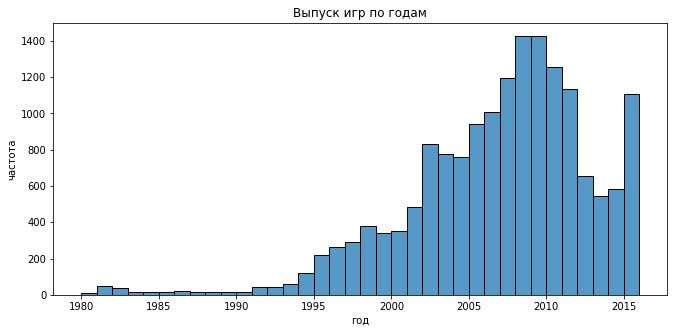

In [15]:
f, ax = plt.subplots(figsize=(11, 5))
sns.histplot(data=df_games, x="year_of_release", bins=36)
plt.title('Выпуск игр по годам')
plt.xlabel('год')
plt.ylabel('частота')

Мы видим что большой рывок в развитии индустрии произошел после 1990 года, до этого выпустилось очень маленкое кол-во игр.

Посмотрим как менялись продажи по платформам с течением времени

Text(159.0, 0.5, 'платформа')

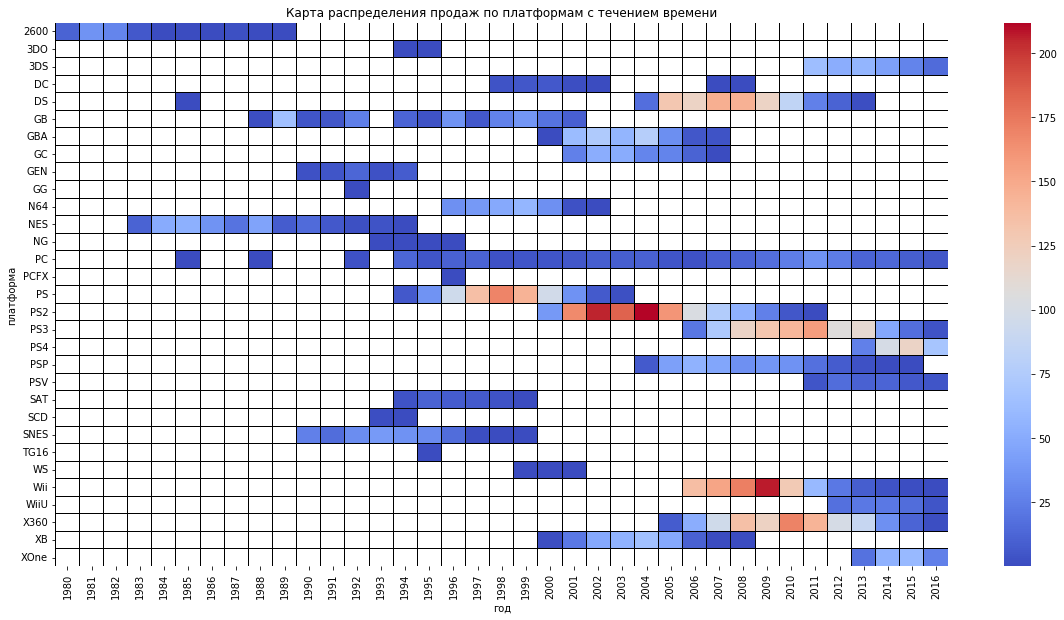

In [16]:
platform = df_games.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum')
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(platform, cmap='coolwarm', linewidths=0.01, linecolor='black')
plt.title('Карта распределения продаж по платформам с течением времени')
plt.xlabel('год')
plt.ylabel('платформа')

На графике видно, что платформы 'живут' примерно по 10 лет, посмотрим на точные значения

In [17]:
platform.apply('count', axis=1).sort_values(ascending=False)

platform
PC      26
GB      13
PSP     12
X360    12
NES     12
PS2     12
DS      11
Wii     11
PS3     11
PS      10
2600    10
SNES    10
XB       9
GBA      8
DC       7
N64      7
GC       7
PSV      6
SAT      6
3DS      6
GEN      5
WiiU     5
XOne     4
PS4      4
NG       4
WS       3
SCD      2
3DO      2
TG16     1
PCFX     1
GG       1
dtype: int64

In [18]:
platform.apply('count', axis=1).sort_values(ascending=False).mean()

7.67741935483871

Среднее получилось около 8 лет, так же у нас есть явный рекордсмен - ПК.

Найдем значения для платформ с лучшими сумарными продажами

Text(159.0, 0.5, 'платформа')

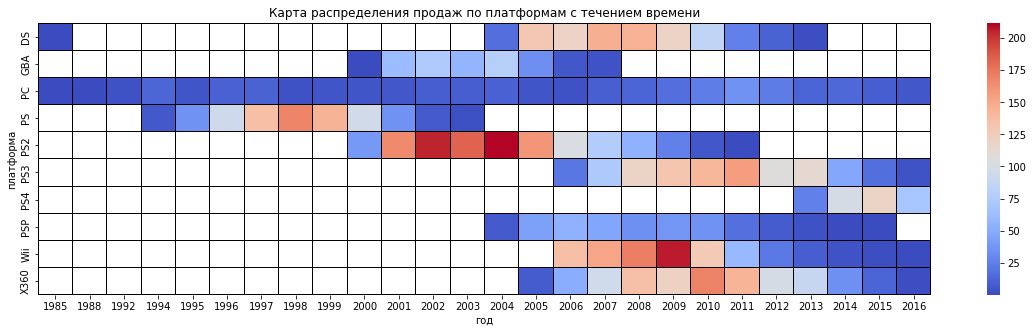

In [19]:
# найдем топ 10 платформ
top_list = df_games.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(10).index.values
top_platform = df_games[df_games['platform'].isin(top_list)]
# построим для них график
top_pivot = top_platform.pivot_table(
    index='platform',
    columns='year_of_release',
    values='all_sales',
    aggfunc='sum')
f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(top_pivot, cmap='coolwarm', linewidths=0.01, linecolor='black')
plt.title('Карта распределения продаж по платформам с течением времени')
plt.xlabel('год')
plt.ylabel('платформа')

In [20]:
top_platform.apply('count', axis=1).sort_values(ascending=False).mean()

10.582572743583743

Мы видим что платформы с лучшими продажами живут дольше - примерно 10-11 лет.

Создадим новую таблицу с актуальными данными. Актуальными будем считать данные с 2011 года(год выпуска нового поколения платформ). Данные должны быть актуальны примерно до 2021-2022 гг., что покрывает нужный нам год.

In [21]:
actual_df = df_games[df_games['year_of_release'] >= 2011]

Посмотрим на продажи плтаформ и определим потенциально прибыльные

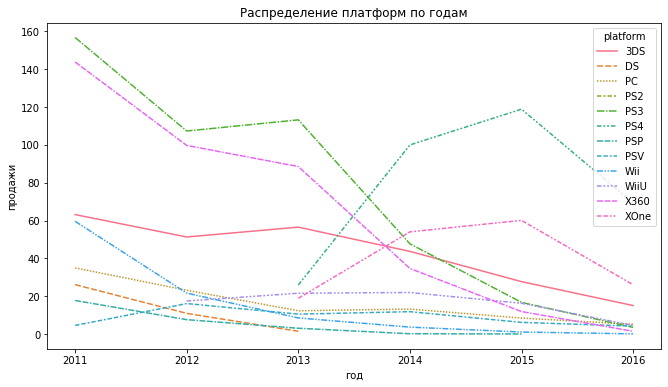

In [22]:
plt.figure(figsize=(11, 6))
plt.title('Распределение платформ по годам')
plt.xlabel('год')
plt.ylabel('продажи')
sns.lineplot(data=actual_df.pivot_table(index='year_of_release',
    columns='platform',
    values='all_sales',
    aggfunc='sum'))

Мы видим что к 2016 году на всех платформах идет падение продаж, но по нему еще нет полной информации, так что будем оценивать по 2015 году. Рост наблюдается только у 2х платформ, это PS4 и XOne, у остальных же идет падение. Падение у компактных плтаформ можно обьяснить развитием игр на смартфонах, а PC скорее всего из за роста цен на "железо" и увеличения уникального контента на приставках.

Посмотрим на цифры и определим лидеров продаж

In [23]:
# данные будем брать до 2015 года т.к. данный за 2016 не полные
actual_pivot = actual_df[actual_df['year_of_release'] < 2016].pivot_table(index='platform',
    columns='year_of_release',
    values='all_sales',
    aggfunc='sum')
actual_pivot.sort_values(by=2015, ascending=False) # данные отсортируем по 2015 году

year_of_release,2011,2012,2013,2014,2015
platform,,,,,
PS4,NaN,NaN,25.99,100.00,118.90
XOne,NaN,NaN,18.96,54.07,60.14
3DS,63.20,51.36,56.57,43.76,27.78
PS3,156.78,107.36,113.25,47.76,16.82
WiiU,NaN,17.56,21.65,22.03,16.35
X360,143.84,99.74,88.58,34.74,11.96
PC,35.03,23.22,12.38,13.28,8.52
PSV,4.63,16.19,10.59,11.90,6.25
Wii,59.65,21.71,8.59,3.75,1.14


Мы видим что тройку лидеров закрывают новые платформы - PS4, XOne и 3DS. Их мы и будем считать потенциально прибыльными.

#### Анализ потенциально прибыльных платформ

Построим boxplot и посмотрим на распределения и выбросы.

In [24]:
top3 = df_games[df_games['platform'].isin(['PS4', 'XOne', '3DS'])]

Text(0, 0.5, 'платформа')

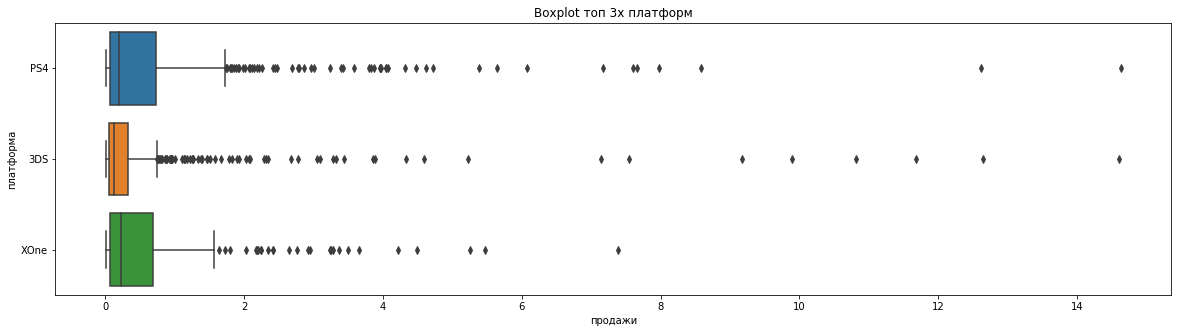

In [25]:
f, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(y='platform', x='all_sales',
            data = top3
            , orient='h')
plt.title('Boxplot топ 3х платформ')
plt.xlabel('продажи')
plt.ylabel('платформа')

Мы видим большое кол-во выбросов, постараемся их сократить ограничив суммы глобальных продаж

In [26]:
top3 = top3.loc[top3['all_sales'] < 2]

##### PS4

              all_sales  critic_score  user_score
all_sales      1.000000      0.294368   -0.013178
critic_score   0.294368      1.000000    0.615186
user_score    -0.013178      0.615186    1.000000


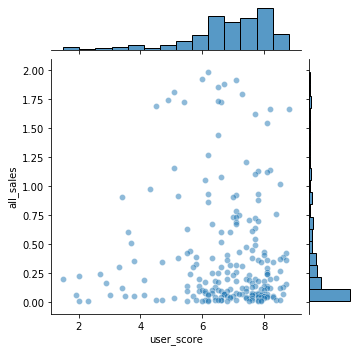

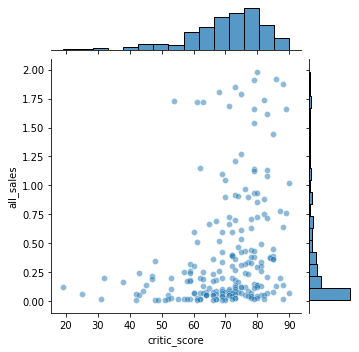

In [27]:
def top3func(platform):
    platform_df = top3.loc[top3['platform']==platform]
    sns.jointplot(x='user_score',
                  y='all_sales',
                  data=platform_df,
                  kind='scatter',
                  alpha=0.5,
                  height=5)
    sns.jointplot(x='critic_score',
                  y='all_sales',
                  data=platform_df,
                  kind='scatter',
                  alpha=0.5,
                  height=5)
    print(platform_df[['all_sales', 'critic_score', 'user_score']].corr())
top3func('PS4')

Мы видим слабую корреляцию с рейтингами критиков и отсутствие корреляции с рейтингами пользователей. А так же среднюю взаимосвязь между оценками критиков и пользователей, скорее всего оценки критиков влияют на часть пользователей. Распределения ассиметричны и смещенны в большую сторону.

##### XOne

              all_sales  critic_score  user_score
all_sales      1.000000      0.433697    0.079890
critic_score   0.433697      1.000000    0.546168
user_score     0.079890      0.546168    1.000000


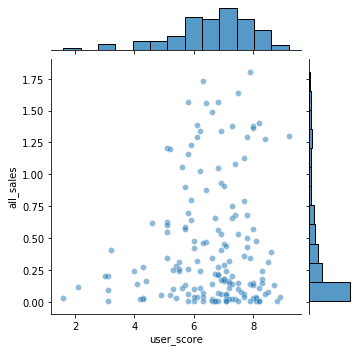

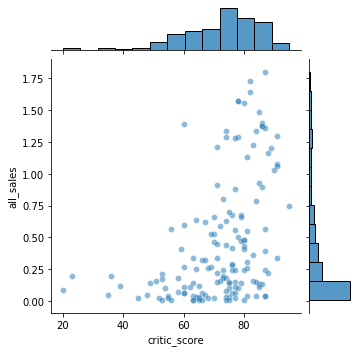

In [28]:
top3func('XOne')

Мы видим слабую корреляцию с рейтингами критиков и отсутствие корреляции с рейтингами пользователей. Связь оценок критиков и пользователей здесь меньше, а значит пользователи в меньшей степени зависят от критиков. Распределения ассиметричны и смещенны в большую сторону.

##### 3DS

              all_sales  critic_score  user_score
all_sales      1.000000      0.260392    0.177411
critic_score   0.260392      1.000000    0.722334
user_score     0.177411      0.722334    1.000000


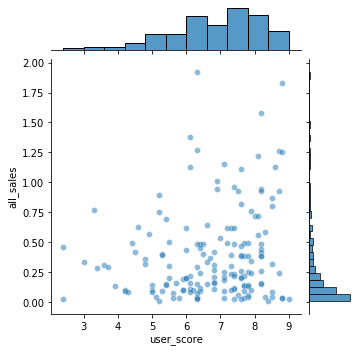

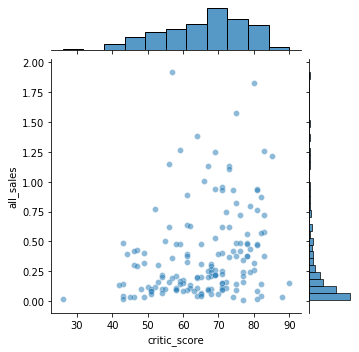

In [29]:
top3func('3DS')

В данном примере есть слабая корреляция продаж с рейтингами критиков и с рейтингами пользователей, а также сильная взаимосвязь отзывов критиков и пользователей. Можно сделать вывод, что оценки пользователей сильно зависят от оценок критиков, а при покупке руководствуются оценками и тех и других. Распределения ассиметричны и смещенны в большую сторону.

#### Анализ жанров

Text(0, 0.5, 'кол-во')

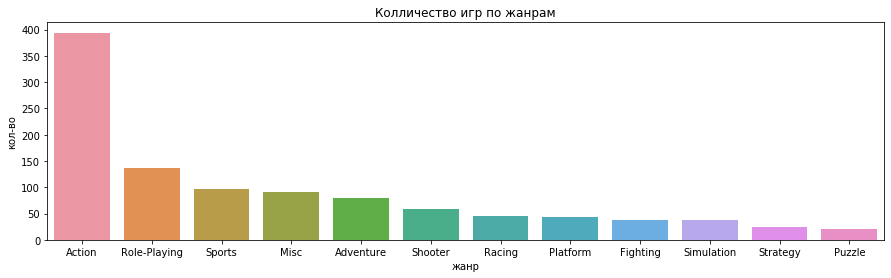

In [30]:
top_geres = top3.groupby('genre').count().sort_values(by='name', ascending=False).reset_index()
plt.figure(figsize=(15, 4))
sns.barplot(data=top_geres, x='genre', y='name')
plt.title('Колличество игр по жанрам')
plt.xlabel('жанр')
plt.ylabel('кол-во')

У нас есть явный лидер по колличеству игр! И это экшены, за ними идут ролевые, шутеры, стратегии и симуляторы. Файтинги, пазлы и платформеры показали себя худше всего.

Теперь посмотрим на продажи

Text(0, 0.5, 'продажи')

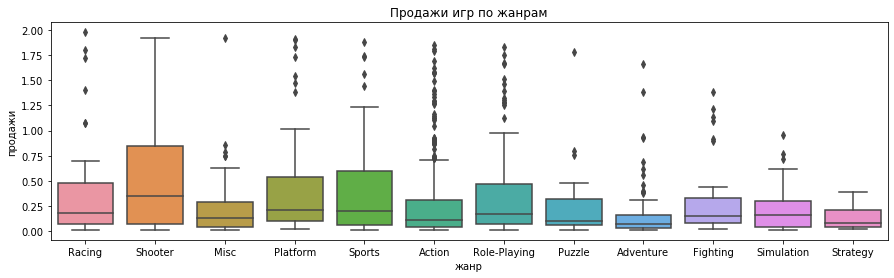

In [31]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=top3, x='genre', y='all_sales')
plt.title('Продажи игр по жанрам')
plt.xlabel('жанр')
plt.ylabel('продажи')

Тут наша тройка лидеров поменялась, на первом месте теперь шутеры, далее идут спортивные игры, ролевые, платформеры и гонки. Хуже всего покупают приключенческие игры.

#### Вывод

По результатам анализа можно сделать вывод, что хоть после 2010 года и было падение продаж, но в 2016 году несмотря на неполноту данных виден рост за счет платформ нового поколения. Платформы же старых поколений заметно падают в продажах.
Средний уровень "жизни" платформ около 8 лет, однако на платформах с лучшими продажами он выше 10-11 лет. На основании этого можно предположить, что если взять период с 2011 года(года выпуска консолей нового поколения), то мы можем предположить их актуальность и потенциальную прибыльность до 2021 года. Так же посчитав корреляции, можно придти к выводу, что есть небольшая зависимость между покупками и оценками критиков, оценки пользователей имели маленькую взаимосвязь только в японском сегменте, а также наблюдается взаимосвязь между оценками критиков и пользователей. Так же мы определили топ 5 жанров по продажам - это шутеры, спортивные и ролевые игры которые идут с хорошим отрывом, а так же платформеры и гонки. Хуже всего показали себя пазлы и файтинги.

### Портрет пользователя по регионам

#### Попульярные платформы

Посмотрим какие платформы прдепочитают в зависимости от региона

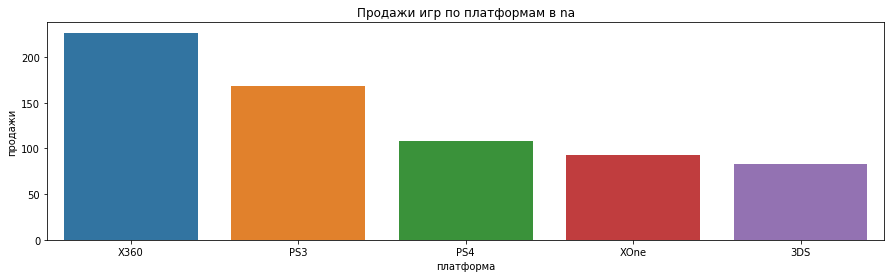

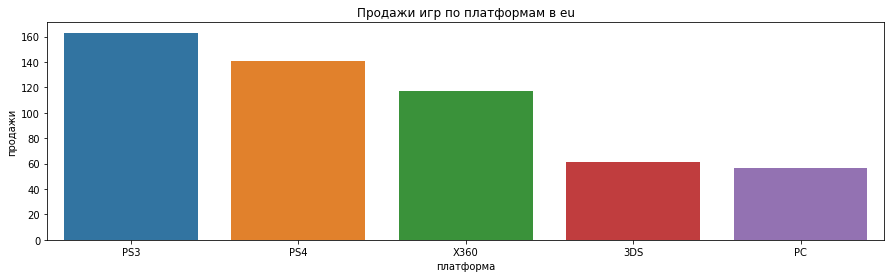

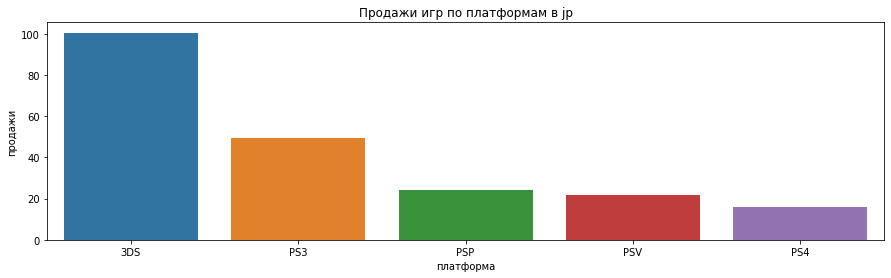

In [32]:
def reg_plat(region):
    region_platform = actual_df.groupby('platform') \
    .sum() \
    .sort_values(by=f'{region}_sales', ascending=False).reset_index() \
    .head()
    
    plt.figure(figsize=(15, 4))
    sns.barplot(data=region_platform, x='platform', y=f'{region}_sales')
    plt.title(f'Продажи игр по платформам в {region}')
    plt.xlabel('платформа')
    plt.ylabel('продажи')

reg_plat('na')
reg_plat('eu')
reg_plat('jp')

* Мы видим, что в северной америке предпочитают в основном консоли Xbox и PlayStation, а так же есть часть пользователей предпочитающийх 3DS. Большую часть пока занимают консоли старого поколения, но за ними примерно на ровне идут новые.
* В европе виден сильный рост PS4 и хорошие показатели 3DS, но старые платформы занимают большую часть рынка. Так же мы видим, что только в европе в лучшие платформы входит PC стоит учесть это в дальнейшем.
* В японии же явный лидер 3DS, да и в целом есть тенденция на компактные платформы. Мы видим, что из старых платформ остались PS3 и PSP, а в спину им дышат PSV и PS4, при этом PSV почти на треть обгоняет по продажам PS4

#### Популярные жанры

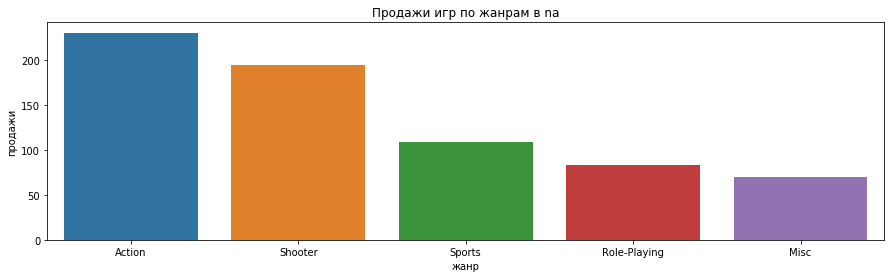

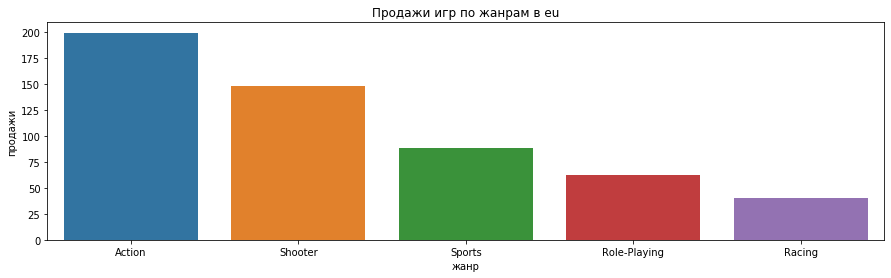

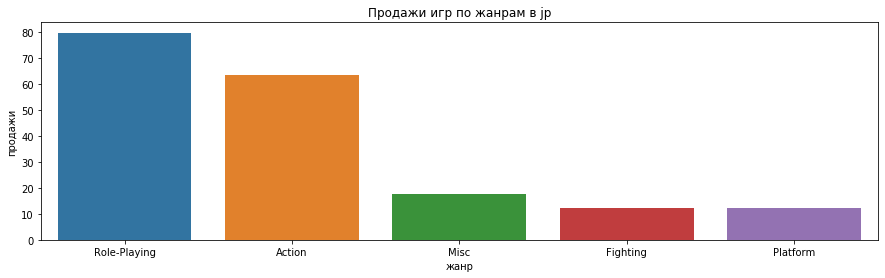

In [33]:
def reg_gen(region):
    region_platform = actual_df.groupby('genre') \
    .sum() \
    .sort_values(by=f'{region}_sales', ascending=False) \
    .reset_index() \
    .head()
    
    plt.figure(figsize=(15, 4))
    sns.barplot(data=region_platform, x='genre', y=f'{region}_sales')
    plt.title(f'Продажи игр по жанрам в {region}')
    plt.xlabel('жанр')
    plt.ylabel('продажи')

reg_gen('na')
reg_gen('eu')
reg_gen('jp')

Ситуация в америке и европе примерно одинаковая первые 4 места там занимают экшены, шутеры, спорт и ролевые игры. За исключением того, что в америке больше любят музыкальные игры а в европе гонки. В японии же ситуация иная. Большую часть рынка занимают ролевые игры и экшены, за ними идут музыка, файтинги и платформеры.

#### Зависимость продаж от рейтинга

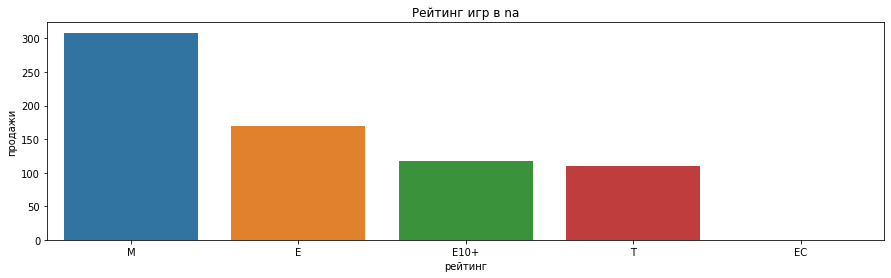

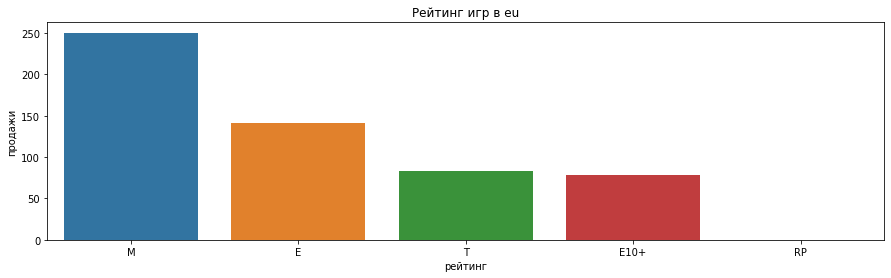

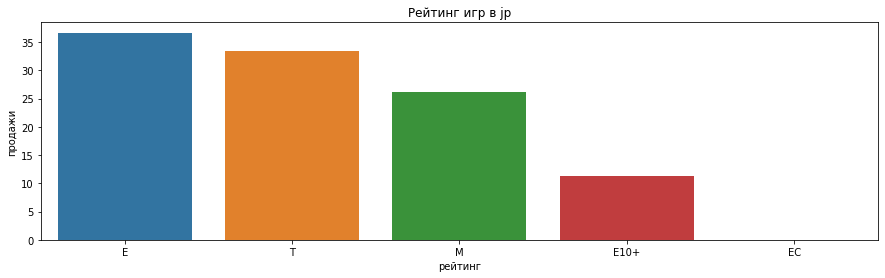

In [34]:
def reg_rat(region):
    region_platform = actual_df.groupby('rating') \
    .sum() \
    .sort_values(by=f'{region}_sales', ascending=False).reset_index().head()
    
    plt.figure(figsize=(15, 4))
    sns.barplot(data=region_platform, x='rating', y=f'{region}_sales')
    plt.title(f'Рейтинг игр в {region}')
    plt.xlabel('рейтинг')
    plt.ylabel('продажи')
reg_rat('na')
reg_rat('eu')
reg_rat('jp')

С рейтингами примерно тоже что и выше, в америке и европе основные рейтинги это M и E, за ними идут T и E10+. В японии же первыми идут E и T, а за ними M и E10+. В целом можно сказать что в америке и европе предпочитают игры M(для взрослых) и E(для всех), тогда как в японии E(для всех) и T(для подростков).

#### Вывод

По результатам анализа мы можем составить портеты пользователей разных регионов:
* В северной америке пользователи в основном играют на консолях, большую часть рынка все еще занимают консоли старого поколения, а так же есть часть пользователей предпочитающий 3DS. Популярными жанрами являются экшены, шутеры, спортивные, ролевые и музыкальные игры с рейтингом для M(для взрослых) и E(для всех).
* В европе хорошо набирает обороты PS4, но большая часть рынка остается у старых платформ, так же себя хорошо показывает 3DS, а за ней не отстает PC что следует учесть в дальнейшем. Жанры популярны такие же как в америке за исключением музыки, в европе больше любят гонки. То же касается и рейтингов, предпочитают M(для взрослых) и E(для всех).
* В японии же картина другая. Тут более популярны компакные платформы - сильно выделяется 3DS, а так же хорошо себя показывает PSV, PS4 же идет в конце с сильным отставанием. Жанры тут тоже предпочитают иные в основном это мультиплееры и экшены, за ними идут платформеры файтинги и музыкальные игры. Лидирующие рейтинги так же иные, японцы в большинстве предпочитают игры с рейтингом E(для всех) и T(для подростков).

### Проверка гипотез

**Посмотрим, как различаются средние пользовательские рейтинги платформ Xbox One и PC.**

Сформулируем гипотезу о равенстве средних двух генеральных совокупностей: 
* H0 (нулевая гипотеза): Средние пользовательские рейтинги для платформ Xbox One и PC равны. 
* H1 (альтернативная гипотеза): Средние пользовательские рейтинги для платформ Xbox One и PC не равны.

Для того чтобы првильно выбрать параметр equal_var, сравним дисперсии

In [35]:
xbox = actual_df.query('platform == "XOne"')
pc = actual_df.query('platform == "PC"')

xbox_list = xbox['user_score'][xbox['user_score'].notna()].tolist()
pc_list = pc['user_score'][pc['user_score'].notna()].tolist()
alpha = 0.05
stat, p = st.levene(xbox_list, pc_list)
result_levene = p



if result_levene < alpha:
    print('Дисперсии различны: equal_var=False')
else:
    print('Дисперсии схожи: equal_var=True')


Дисперсии различны: equal_var=False


Критический уровень значимости укажем 1% т.к имеем выборку хорошего размера и менее вероятно получить случайные результаты чем в маленькой выборке

In [36]:
alpha = 0.01 
results = st.ttest_ind(xbox_list, pc_list, equal_var=False)

print('p-values:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-values: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


Мы получили довольно высокое p значение, оно означает что с вероятностью 61% мы можем получить такие или более выраженные различия случайно и нет оснований для отвержения нулевой гипотезы.

**Теперь проверим, как различаются средние пользовательские оценки жанров Action и Sports.**

Сформулируем гипотезу о равенстве средних двух генеральных совокупностей 
* H0 (нулевая гипотеза): Средние пользовательские рейтинги для жанров Action и Sports равны. 
* H1 (альтернативная гипотеза): Средние пользовательские рейтинги для жанров Action и Sports не равны.

Так же проверим различия дисперсий

In [37]:
action = actual_df.query('genre == "Action"')
sports = actual_df.query('genre == "Sports"')

action_list = action['user_score'][action['user_score'].notna()].tolist()
sports_list = sports['user_score'][sports['user_score'].notna()].tolist()
alpha = 0.05
stat, p = st.levene(action_list, sports_list)
result_levene = p



if result_levene < alpha:
    print('Дисперсии различны: equal_var=False')
else:
    print('Дисперсии схожи: equal_var=True')

Дисперсии различны: equal_var=False


Критический уровень значимости так же оставим 1% 

In [38]:
alpha = 0.01 
results = st.ttest_ind(action_list, sports_list, equal_var=False)

print('p-values:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-values: 8.285648549432565e-19
Отвергаем нулевую гипотезу


Найдем процент различия рейтинга жанров

In [39]:
num = actual_df.query('genre.isin(["Sports", "Action"])').groupby('genre')['user_score'].mean().values
int((max(num) - min(num)) / max(num) * 100)

16

Мы получили p значение меньше 1%, это значит что у нас есть основания отклонить нулевую гипотезу и предположить что различия между жанрами action и sport не являются случайными.

#### Вывод

По результатам проверки гипотез есть основания предпологать, что пользовательские оценки на Xbox и PC не отличаются, скорее всего это связано с тем что политика компании microsoft не завязана на уникальном контенте как в playstation. Так же мы можем предположить что различия в рейтинге жанров action и sport не случайны и action в среднем на 16% выше.

### Общий вывод

В ходе исследования мы подготовили наши данные к анализу, поработав с пропусками и избавившись от дубликатов, так же мы добавили необходимые для дальнейшего исследования данные. Исследование проводилось в период с 2011 года т.к. в этом году вышли консоли нового поколения на которые идет расчет и так же был рассчитан период актуальности платформ, по предположениям он продлится до 2021 года.

По результатам исследования мы выявили определяющие успешность игры закономерности. Мы выяснили что потенциально успешные игры отличаются по регионам и рекламные компании лучше всего планировать по отдельности для каждого:
* В Северной Америке - это игры для платформ PS4, XOne и 3DS. С такими жанрами как экшен, шутер, спорт, ролевые игры и музыкальные с возрастными рейтингами M и E, а так же с высокими оценками критиков
* В Европе это игры для платформ PS4, 3DS и PC(это единственная территория где PC остается актуальным). Жанры в европе схожи с Америкой за исключением музыки, в Европе предпочитают гонки также с рейтингами M и E, а так же высокими оценками критиков
* В Японии ситуация отличается, тут более популярны компактные платформы - 3DS, PSV а так же PS4. Популярные жанры - это мультиплееры и экшены, а так же чуть менее - платформеры файтинги и музыкальные игры с рейтингом E и T. Так же одинаково важны оценки критиков и пользователей

Если же не будет возможности рекламных компаний по регионам, то есть потенциально прибыльные игры для всех - это игры на платформах PS4, XOne и 3DS с такими жанрами как шутеры, ролплей и спорт, и рейтингом E, M и T. А так же с высокой оценкой критиков.